<a href="https://colab.research.google.com/github/Shohail786/Titanic-ML-problem/blob/main/Titanic_ML_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the Libraries and dependencies**

In [1]:
pip install catboost

     |████████████████████████████████| 69.2MB 49kB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import math, time, random, datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Load the training and test data 


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Titanic files/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Titanic files/test.csv')
gender_submission_data = pd.read_csv('/content/drive/MyDrive/Titanic files/gender_submission.csv')

# View and Plot the train data

In [4]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


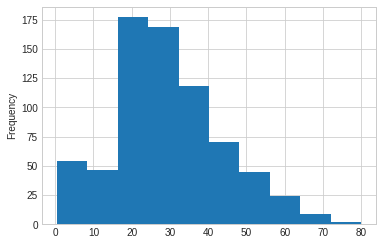

In [5]:
train_data.Age.plot.hist()

# View and Plot the test data

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


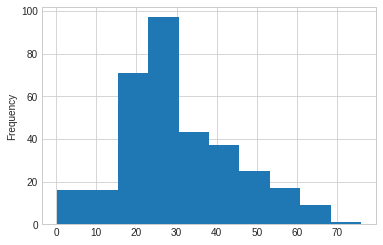

In [7]:
test_data.Age.plot.hist()

# View the Gender Submission Data

In [8]:
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Values in the Train Data

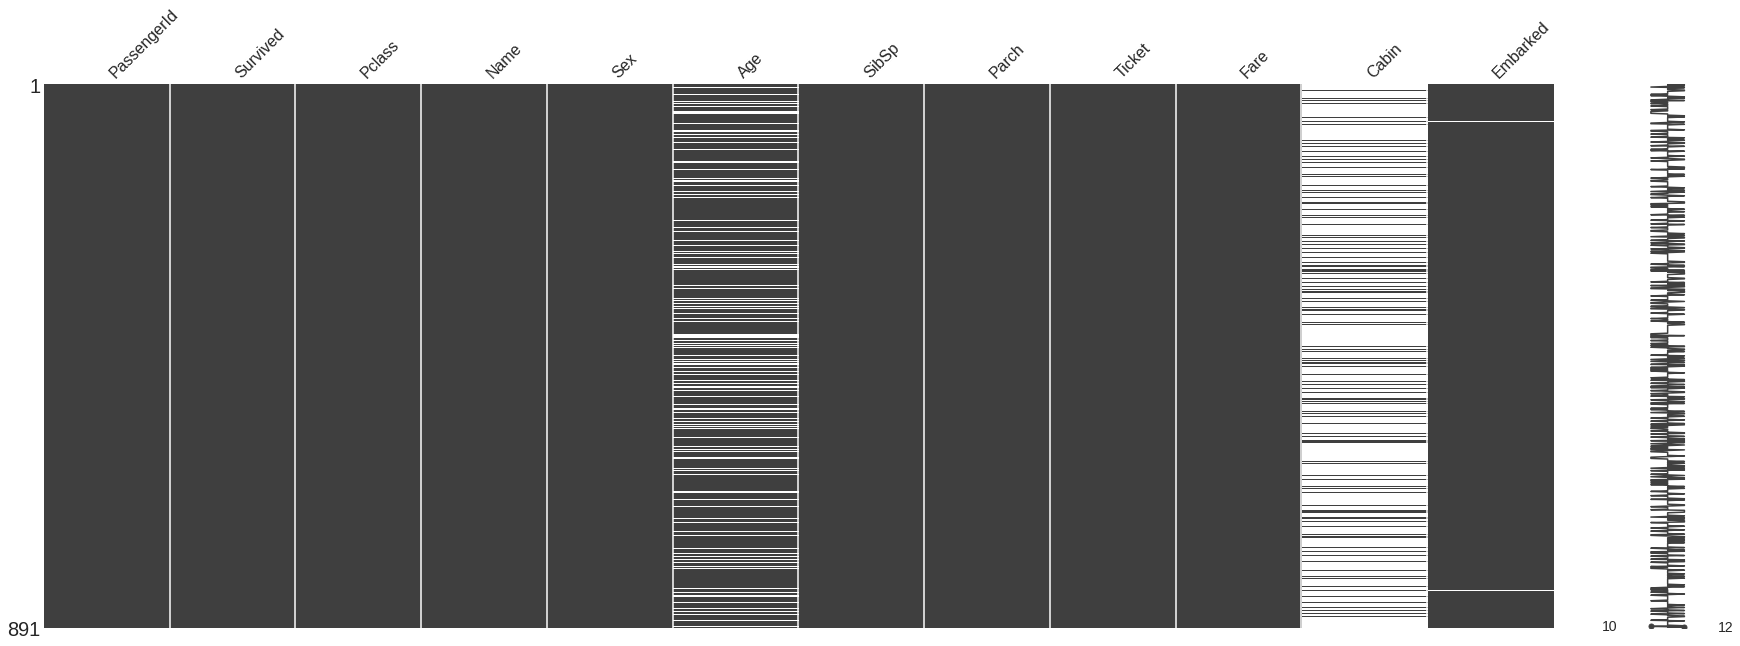

In [10]:
missingno.matrix(train_data, figsize=(30,10))

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Analysis

In [12]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df_dis = pd.DataFrame()
df_con = pd.DataFrame()

In [14]:
df_dis['Survived']=train_data['Survived']
df_con['Survived']=train_data['Survived']

Feature analysis

---



Pclass:



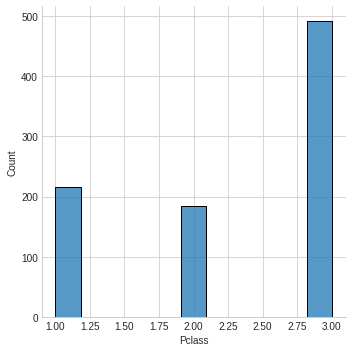

In [15]:
sns.displot(train_data.Pclass)

In [16]:
train_data.Pclass.isnull().sum()

0

In [17]:
df_dis['Pclass']=train_data['Pclass']
df_con['Pclass']=train_data['Pclass']

Name:

In [18]:
train_data.Name.value_counts()

Johannesen-Bratthammer, Mr. Bernt                 1
Boulos, Mr. Hanna                                 1
Samaan, Mr. Youssef                               1
Nankoff, Mr. Minko                                1
Reuchlin, Jonkheer. John George                   1
                                                 ..
Ridsdale, Miss. Lucy                              1
Backstrom, Mr. Karl Alfred                        1
Robins, Mrs. Alexander A (Grace Charity Laury)    1
Attalah, Miss. Malake                             1
Davies, Mr. Charles Henry                         1
Name: Name, Length: 891, dtype: int64

Sex:

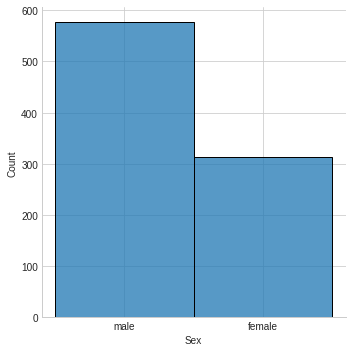

In [19]:
sns.displot(train_data.Sex)

In [20]:
train_data.Sex.isnull().sum()

0

In [21]:
df_dis['Sex']=train_data['Sex']
df_dis['Sex']=np.where(df_dis['Sex']=='female',1,0)
df_con['Sex']=train_data['Sex']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


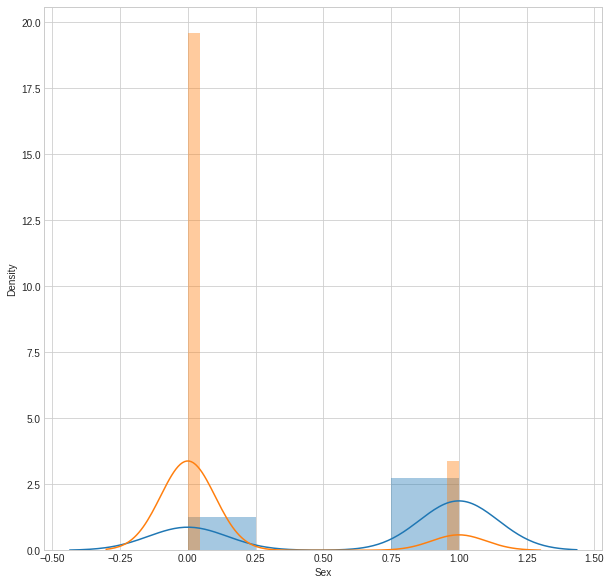

In [22]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_dis.loc[df_dis['Survived']==1]['Sex'],kde_kws={"label":"Survived"});
sns.distplot(df_dis.loc[df_dis['Survived']==0]['Sex'],kde_kws={"label":"Not Survived"});

Age:


In [23]:
train_data.Age.isnull().sum()

177

SibSp:

In [24]:
train_data.SibSp.isnull().sum()

0

In [25]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
df_dis['SibSp']=train_data['SibSp']
df_con['SibSp']=train_data['SibSp']

In [27]:
def plot(data, df_dis,column_label,column_target,figsize=(20,10), bool_df_dis=False):
  if bool_df_dis:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=column_target,data=df_dis);
    plt.subplot(1,2,2)
    sns.distplot(data.loc[data[column_label]==1][column_target],kde_kws={"label":"Survived"});
    sns.distplot(data.loc[data[column_label]==0][column_target],kde_kws={"label":"Not Survived"});  
  else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=column_target,data=data);
    plt.subplot(1,2,2)
    sns.distplot(data.loc[data[column_label]==1][column_target],kde_kws={"label":"Survived"});
    sns.distplot(data.loc[data[column_label]==0][column_target],kde_kws={"label":"Not Survived"});


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


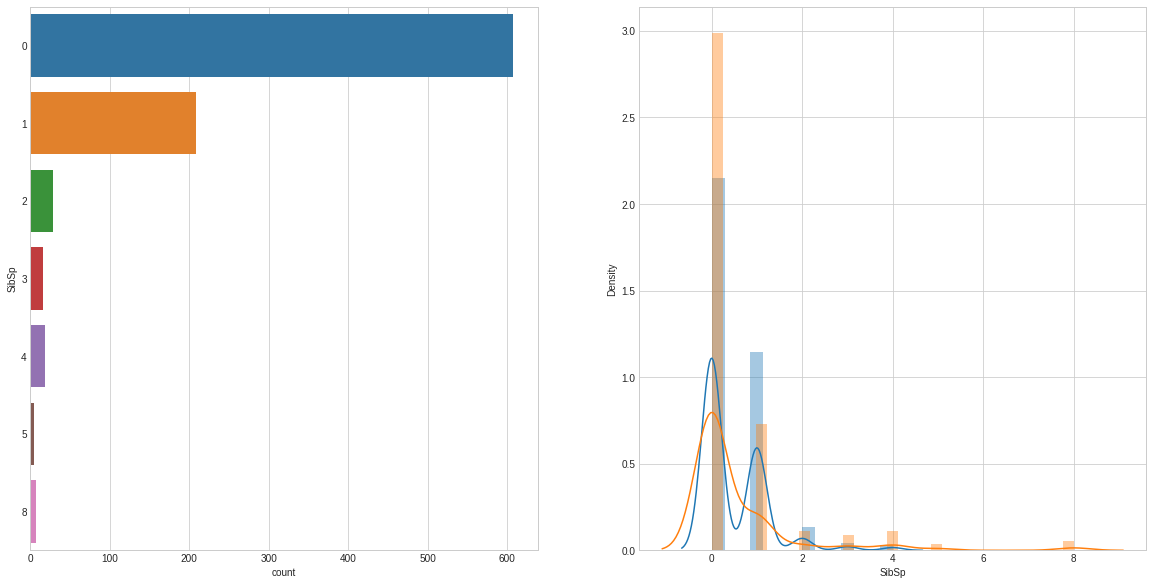

In [28]:
plot(train_data,df_dis,column_label='Survived',column_target='SibSp',figsize=(20,10))

Parch:

In [29]:
train_data.Parch.isnull().sum()

0

In [30]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
df_dis['Parch']=train_data['Parch']
df_con['Parch']=train_data['Parch']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


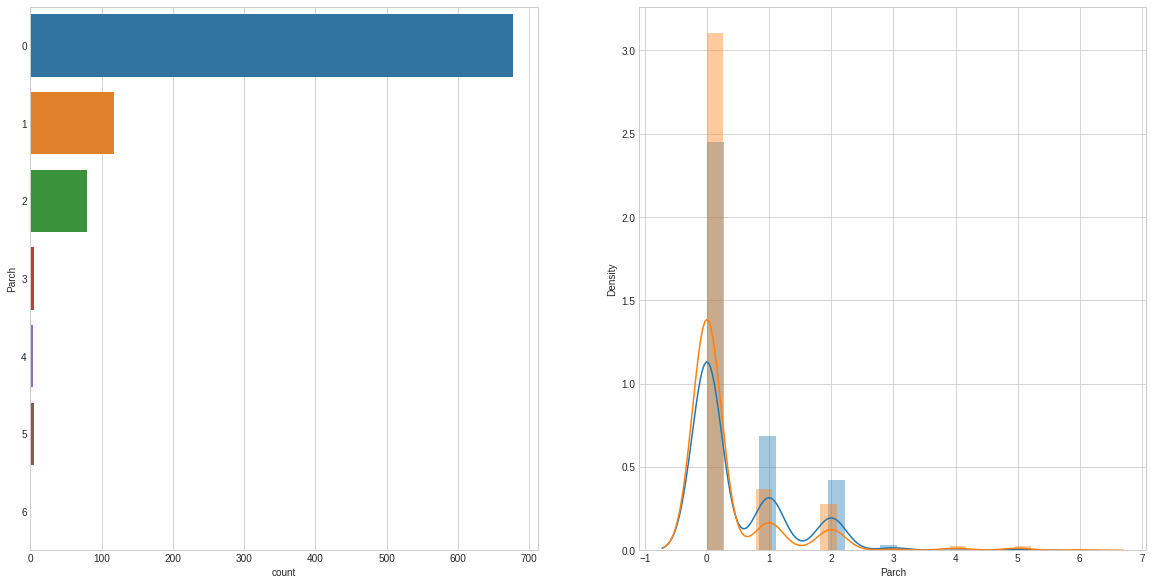

In [32]:
plot(train_data,df_dis, column_label='Survived',column_target='Parch',figsize=(20,10))

Ticket:

In [33]:
train_data.Ticket.isnull().sum()

0

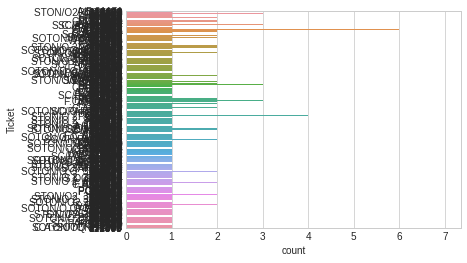

In [34]:
sns.countplot(y="Ticket",data=train_data);

In [35]:
train_data.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
CA 2144     6
3101295     6
           ..
335677      1
347470      1
349203      1
349242      1
219533      1
Name: Ticket, Length: 681, dtype: int64

Fare:

In [36]:
train_data.Fare.isnull().sum()

0

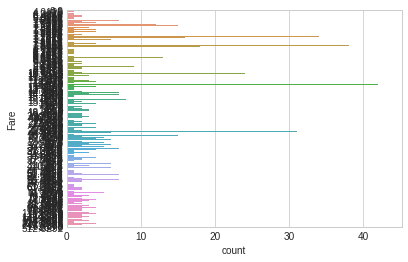

In [37]:
sns.countplot(y="Fare",data=train_data);

In [38]:
train_data.Fare.dtype

dtype('float64')

In [39]:
df_con['Fare']=train_data['Fare']
df_dis['Fare']=pd.cut(train_data['Fare'],bins=5)

In [40]:
df_dis.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


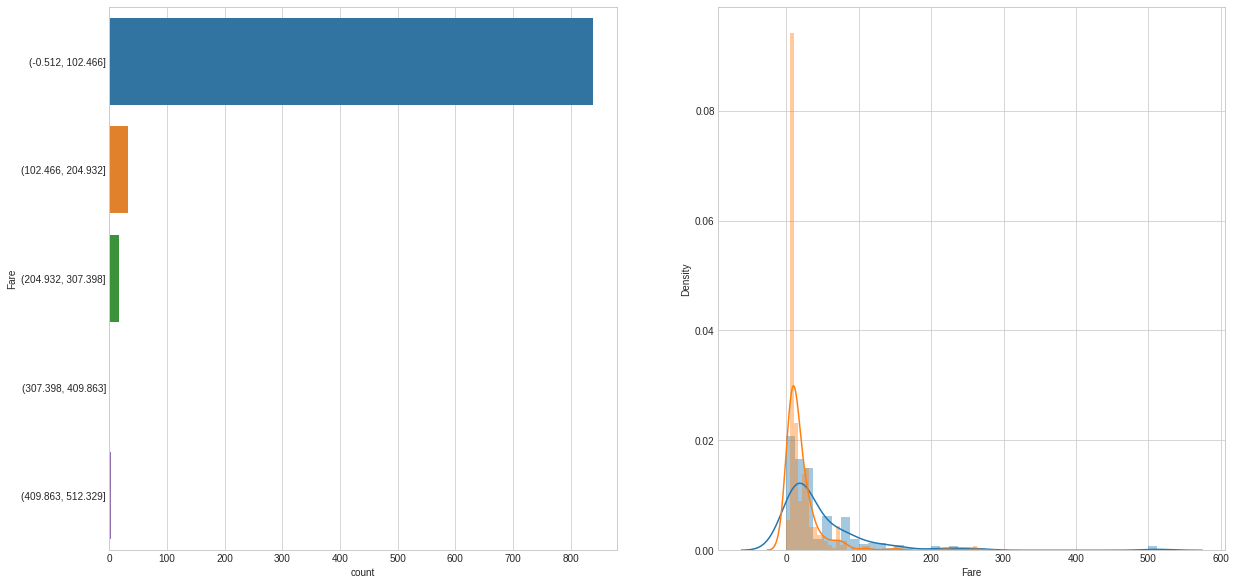

In [41]:
plot(train_data,df_dis,column_label='Survived',column_target='Fare',figsize=(20,10),bool_df_dis=True)

Cabin:

In [42]:
train_data.Cabin.isnull().sum()

687

Embarked:

In [43]:
train_data.Embarked.isnull().sum()

2

In [44]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

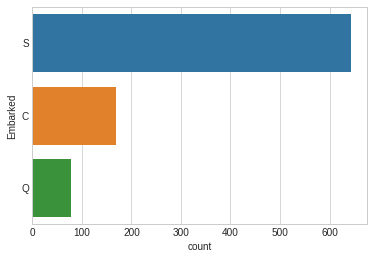

In [45]:
sns.countplot(y='Embarked',data=train_data);

In [46]:
df_dis['Embarked']=train_data['Embarked']
df_con['Embarked']=train_data['Embarked']

In [47]:
print(len(df_con))
print(len(df_dis))
df_con=df_con.dropna(subset=['Embarked'])
df_dis=df_dis.dropna(subset=['Embarked'])
print(len(df_con))
print(len(df_dis))

891
891
889
889


# One-Hot Encodding

In [48]:
df_dis.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [49]:
hot_encoder_col=df_dis.columns.tolist()
hot_encoder_col.remove('Survived')
df_dis_encode= pd.get_dummies(df_dis,columns=hot_encoder_col)
df_dis_encode.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [50]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [51]:
df_Embarked_hot_encoder=pd.get_dummies(df_con['Embarked'],prefix='Embarked')
df_Sex_hot_encoder=pd.get_dummies(df_con['Sex'],prefix='Sex')
df_Pclass_hot_encoder=pd.get_dummies(df_con['Pclass'],prefix='Pclass')

In [52]:
df_con_encode=pd.concat([df_con,df_Embarked_hot_encoder,df_Sex_hot_encoder,df_Pclass_hot_encoder],axis=1)
df_con_encode=df_con_encode.drop(['Pclass','Sex','Embarked'],axis=1)

In [53]:
df_con_encode.head(10)

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


# Create the Machine Learning Model

In [54]:
data1=df_con_encode
data1.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [55]:
Xtrain=data1.drop('Survived',axis=1)
Ytrain=data1.Survived

In [56]:
Xtrain.shape

(889, 11)

In [57]:
Ytrain.shape

(889,)

In [58]:
Xtrain.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [59]:
Ytrain.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Code for calculating the model parameters:

In [60]:
def ML_algorithm(ml_alg,Xtrain,Ytrain, c):
  ml_model=ml_alg.fit(Xtrain,Ytrain)
  accuracy_calc= round(ml_model.score(Xtrain,Ytrain)*100,2)
  cv_test=model_selection.cross_val_predict(ml_alg,Xtrain,Ytrain,cv=c,n_jobs=-1)
  cv_accuracy_calc=round(metrics.accuracy_score(Ytrain, cv_test)*100,2)

  return ml_model,cv_test,accuracy_calc,cv_accuracy_calc

**Model Based on** **SVC: Linear Support Vector Machines**

In [61]:
starttime=time.time()
svc_model,cv_svc_test,accuracy_svc,accuracy_svc_cv=ML_algorithm(LinearSVC(),Xtrain,Ytrain,10)
logtime=(time.time()-starttime)
print("Accuracy of the model = %s"% accuracy_svc)
print("Accuracy of Cross Validation 10-fold = %s" % accuracy_svc_cv)
print("Time of running = %s" % datetime.timedelta(seconds=logtime))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of the model = 79.42
Accuracy of Cross Validation 10-fold = 77.95
Time of running = 0:00:01.631905


**Model** **based** **on** **Logistic** **Regression** 

In [62]:
starttime=time.time()
logrg_model,cv_logrg_test,accuracy_logrg,accuracy_logrg_cv=ML_algorithm(LogisticRegression(),Xtrain,Ytrain,10)
logtime=(time.time()-starttime)
print("Accuracy of the model = %s"% accuracy_logrg)
print("Accuracy of Cross Validation 10-fold = %s" % accuracy_logrg_cv)
print("Time of running = %s" % datetime.timedelta(seconds=logtime))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of the model = 79.98
Accuracy of Cross Validation 10-fold = 79.42
Time of running = 0:00:00.393411


**Model Based on K-nearest Neighbours classifiers**

In [63]:
starttime=time.time()
knn_model,cv_knn_test,accuracy_kn,accuracy_kn_cv=ML_algorithm(KNeighborsClassifier(),Xtrain,Ytrain,10)
logtime=(time.time()-starttime)
print("Accuracy of the model = %s"% accuracy_kn)
print("Accuracy of Cross Validation 10-fold = %s" % accuracy_kn_cv)
print("Time of running = %s" % datetime.timedelta(seconds=logtime))

Accuracy of the model = 83.46
Accuracy of Cross Validation 10-fold = 76.72
Time of running = 0:00:00.150599


# Models and their Scores

In [64]:
Model=pd.DataFrame({
    'Model':['SVC','Logistic Regression','K-nearest Neighbours'],
    'Score':[accuracy_svc,accuracy_logrg,accuracy_kn]
})
Model.sort_values(by='Score',ascending=False)

,Model,Score
2,K-nearest Neighbours,83.46
1,Logistic Regression,79.98
0,SVC,79.42


In [65]:
CV_Model=pd.DataFrame({
    'CV_Model':['SVC','Logistic Regression','K-nearest Neighbours'],
    'CV_Score':[accuracy_svc_cv,accuracy_logrg_cv,accuracy_kn_cv]
})
CV_Model.sort_values(by='CV_Score',ascending=False)

,CV_Model,CV_Score
1,Logistic Regression,79.42
0,SVC,77.95
2,K-nearest Neighbours,76.72


# Work on the Test Data

In [66]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
test_Embarked_hot_encoder=pd.get_dummies(test_data['Embarked'],prefix='Embarked')
test_Sex_hot_encoder=pd.get_dummies(test_data['Sex'],prefix='Sex')
test_Pclass_hot_encoder=pd.get_dummies(test_data['Pclass'],prefix='Pclass')

In [68]:
test_data_encode=pd.concat([test_data,test_Embarked_hot_encoder,test_Sex_hot_encoder,test_Pclass_hot_encoder],axis=1)

In [69]:
test_data_encode.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [70]:
test_colums=Xtrain.columns
test_colums

Index(['SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [71]:
test_data_encode[test_colums].isnull().sum()

SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [72]:
Predict_test = logrg_model.predict(test_data_encode[test_colums])

In [73]:
Predict_test[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [75]:
df_submit=pd.DataFrame()
df_submit['PassengerId']=test_data_encode['PassengerId']
df_submit['Survived']=Predict_test
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
df_submit['Survived']=df_submit['Survived'].astype(int)
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [82]:
#check the length of df_submit and test
if len(df_submit)==len(test_data):
  print("Submit file has same length as test_data ({} rows).".format(len(df_submit)))
else:
  print("Submit file has not the same length as test")

Submit file has same length as test_data (418 rows).


In [85]:
#convert the file to be submit as csv
df_submit.to_csv('/content/drive/MyDrive/Titanic files/shohail_df_submit.csv',index=False)
print('Submission file is ready')

Submission file is ready
